# Statistical visualizations with `seaborn`

In the previous lab you learned about using `matplotlib` to create and modify plots in Python. Today we're going to look at [Seaborn](https://seaborn.pydata.org/index.html) is a plotting library built **on top of** `matplotlib`, that has many pre-configured statistical plots. 

At the same time you can always take what you've learned about customizing a figure in `matplotlib` and apply it to any plot generated by `seaborn`!

## Todo:
1. Copy seaborn [intro notebooks](https://github.com/mwaskom/seaborn/tree/master/doc/_tutorial)
2. Copy prose from [online docs](https://seaborn.pydata.org/tutorial/introduction.html)
3. Combine 1 (intro) & 2 (overview)
4. Combine 6 (stat rels), 7 (dist data), 8 (cat data)
5. Combine 9 (estim erro), 10 (reg fit)
6. Point to the rest
7. Viz starwars


## Intro & Overview

Penguins dataset

## Plot types: distributions, relationships, categories

## Estimates & Uncertainty

## A note on customization

Just link to stuff

## Revisiting Star Wars

In [3]:
import polars as pl

sw = pl.read_csv('starwars.csv')
sw.head()

shape: (5, 11)
┌────────────────┬────────┬───────┬────────────┬───┬────────┬───────────┬───────────┬─────────┐
│ name           ┆ height ┆ mass  ┆ hair_color ┆ … ┆ sex    ┆ gender    ┆ homeworld ┆ species │
│ ---            ┆ ---    ┆ ---   ┆ ---        ┆   ┆ ---    ┆ ---       ┆ ---       ┆ ---     │
│ str            ┆ f64    ┆ f64   ┆ str        ┆   ┆ str    ┆ str       ┆ str       ┆ str     │
╞════════════════╪════════╪═══════╪════════════╪═══╪════════╪═══════════╪═══════════╪═════════╡
│ Luke Skywalker ┆ 172.0  ┆ 77.0  ┆ blond      ┆ … ┆ male   ┆ masculine ┆ Tatooine  ┆ Human   │
│ C-3PO          ┆ 167.0  ┆ 75.0  ┆ null       ┆ … ┆ none   ┆ masculine ┆ Tatooine  ┆ Droid   │
│ R2-D2          ┆ 96.0   ┆ 32.0  ┆ null       ┆ … ┆ none   ┆ masculine ┆ Naboo     ┆ Droid   │
│ Darth Vader    ┆ 202.0  ┆ 136.0 ┆ none       ┆ … ┆ male   ┆ masculine ┆ Tatooine  ┆ Human   │
│ Leia Organa    ┆ 150.0  ┆ 49.0  ┆ brown      ┆ … ┆ female ┆ feminine  ┆ Alderaan  ┆ Human   │
└────────────────┴────────┴───────┴────────────┴───┴────────┴───────────┴───────────┴─────────┘

### Scatterplots
There are many variants of each type of plot that you might like to use. For example, `scatterplot`, `regplot`, `jointplot`.

Let's update our simulation code a little bit to make this easier.

Text(0.5, 1.0, 'Scatterplot')

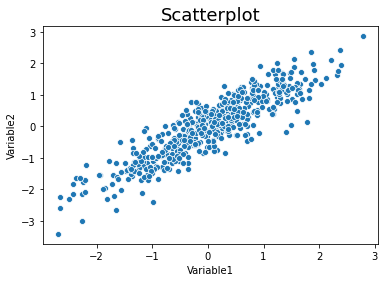

In [82]:
def simulate_xy(n=500, r=0.9):
    mu = np.array([0, 0])
    cov = np.array([[1, r], [r, 1]])
    return pd.DataFrame(
        np.random.multivariate_normal(mu, cov, size=n), columns=["Variable1", "Variable2"]
    )


sns.scatterplot(data=simulate_xy(), x="Variable1", y="Variable2")
plt.title("Scatterplot", fontsize=18)

We can add regression lines with `regplot`.

Text(0.5, 1.0, 'Scatterplot')

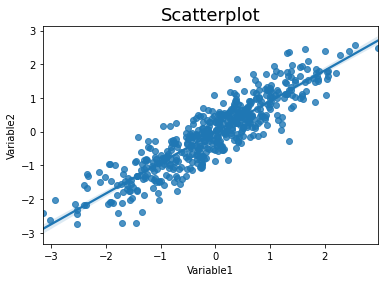

In [85]:
sns.regplot(data=simulate_xy(), x='Variable1', y='Variable2')
plt.title('Scatterplot', fontsize=18)

We can add histograms to show the distributions of x and y with `jointplot`.

Text(0.5, 1.0, 'Jointplot')

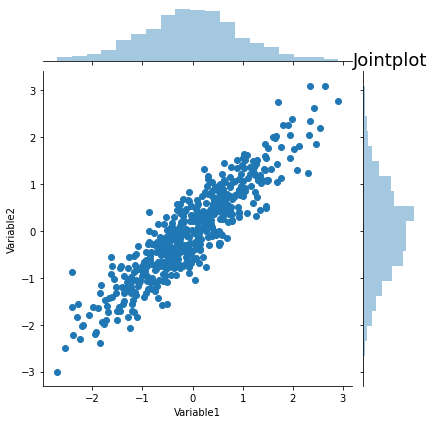

In [90]:
sns.jointplot(data=simulate_xy(), x='Variable1', y='Variable2')
plt.title('Jointplot', fontsize=18)

We can create a quick way to view relations between multiple variables using `pairplot`.

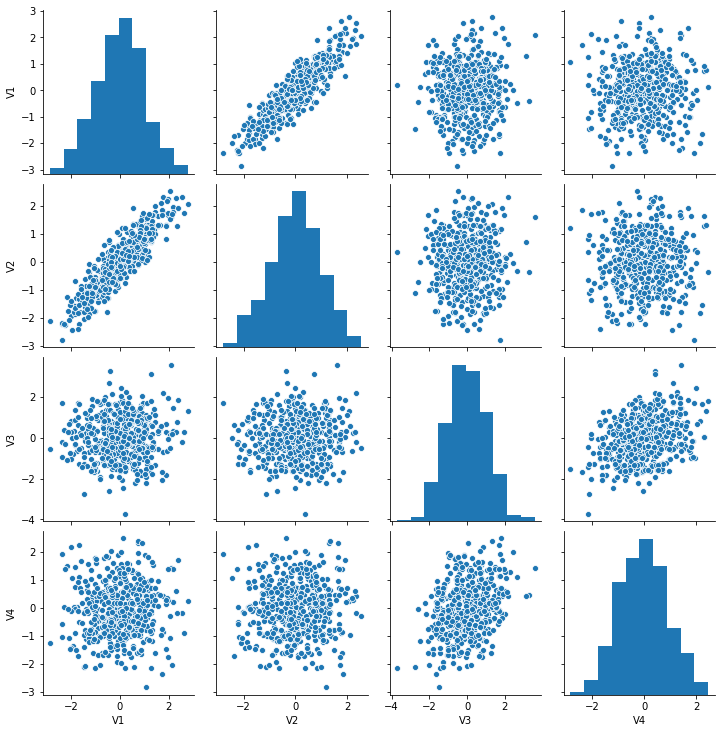

In [95]:
data = pd.concat([simulate_xy(r=.9),simulate_xy(r=.3)], axis=1)
data.columns=['V1', 'V2', 'V3', 'V4']
sns.pairplot(data=data)

### Factor plots 
Factor plots allow you to visualize the distribution of parameters in different forms such as point, bar, or violin graphs.

One important thing to note is that the data needs to be in the long format. Let's quickly simulate some data to plot.

Here are some possible values for kind : {point, bar, count, box, violin, strip}


Text(0.5, 1.0, 'Catplot')

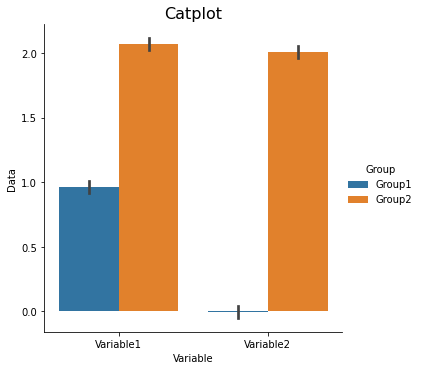

In [110]:
data1 = simulate_xy(r=.9)
data1['Group'] = 'Group1'
data1['Variable1'] = data1['Variable1'] + 1

data2 = simulate_xy(r=.3) + 2
data2['Group'] = 'Group2'

data = pd.concat([data1, data2], axis=0)
data_long = data.melt(id_vars='Group', value_vars=['Variable1', 'Variable2'], var_name='Variable', value_name='Data')

sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='bar')
plt.title('Catplot', fontsize=16)

Text(0.5, 1.0, 'Swarmplot')

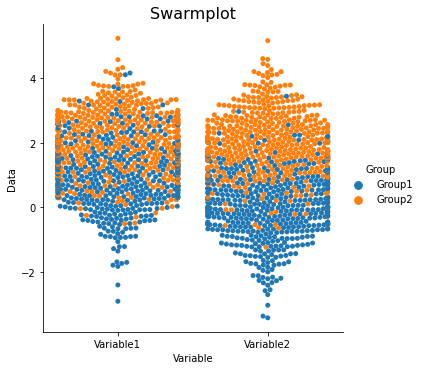

In [112]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='swarm')
plt.title('Swarmplot', fontsize=16)

Text(0.5, 1.0, 'Swarmplot')

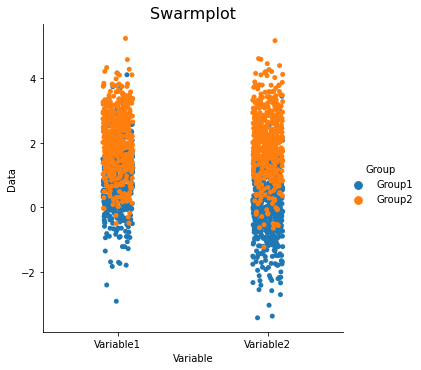

In [113]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='strip')
plt.title('Stripplot', fontsize=16)

Text(0.5, 1.0, 'Violinplot')

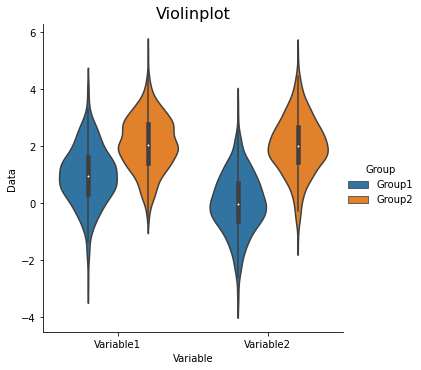

In [114]:
sns.catplot(x='Variable', y='Data', hue='Group', data=data_long, ci=68, kind='violin')
plt.title('Violinplot', fontsize=16)

### Heatmaps
Heatmap plots allow you to visualize matrices such as correlation matrices that show relationships across multiple variables.

Let's create a dataset with different relationships between variables. We can quickly calculate the correlation between these variables and visualize it with a heatmap

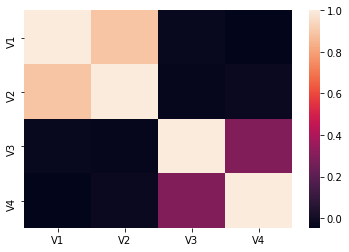

In [116]:
data = pd.concat([simulate_xy(r=.9), simulate_xy(r=.3)], axis=1)

data.columns=['V1', 'V2', 'V3', 'V4']
corr = data.corr()
sns.heatmap(data=corr)

Like all other plots, we can also customize heatmaps.

Text(0.5, 1.0, 'Correlation Matrix')

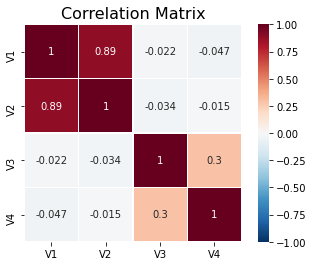

In [121]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16)

There is also a neat type of heatmap that will also reorganize your variable based on clustering.

Text(0.5, 1.0, 'Clustermap')

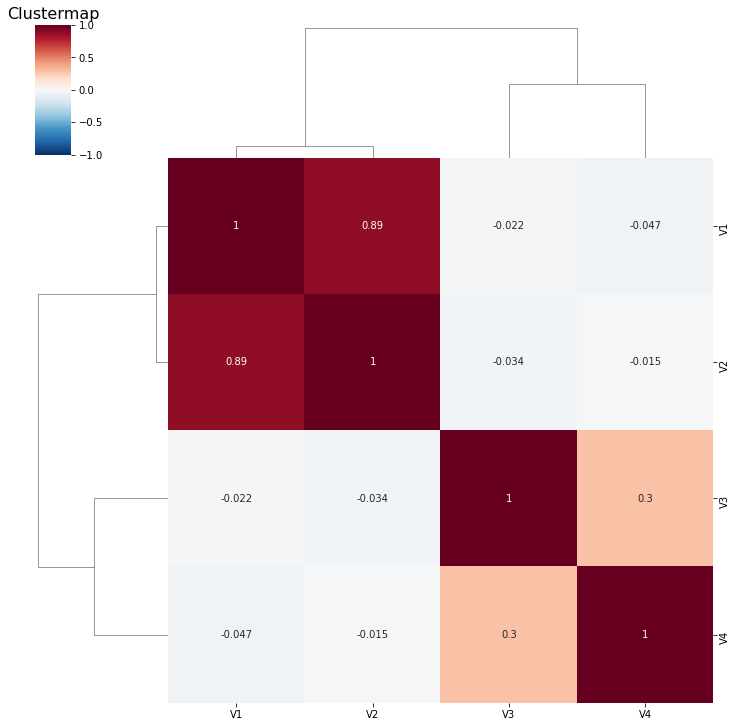

In [126]:
sns.clustermap(corr, square=True, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Clustermap', fontsize=16)

## Pandas

We introduced `Pandas` in a previous tutorial. It can also call matplotlib to quickly generate plots.

We will use the same dataset used in that tutorial to generate some plots using `pd.Dataframe`.

In [3]:
df = pd.read_csv('../../data/salary.csv', sep = ',', header='infer')
df = df.dropna()
df = df[df['gender']!=2]

In [32]:
# key: We use the departm as the grouping factor. 
key = df['departm']

# Let's create an anonmyous function for calculating zscores using lambda:
# We want to standardize salary for each department.
zscore = lambda x: (x - x.mean()) / x.std()

# Now let's calculate zscores separately within each department
transformed = df.groupby(key).transform(zscore)
df['salary_in_departm'] = transformed['salary']

Now we have `salary_in_departm` column showing standardized salary per department.


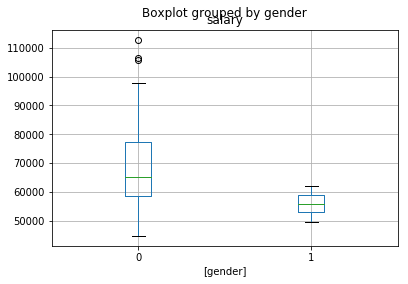

In [36]:
df[['salary','gender']].boxplot(by='gender')

### Scatterplot

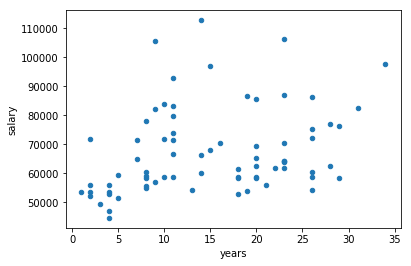

In [37]:
df[['salary', 'years']].plot(kind='scatter', x='years', y='salary')

Now plot all four categories

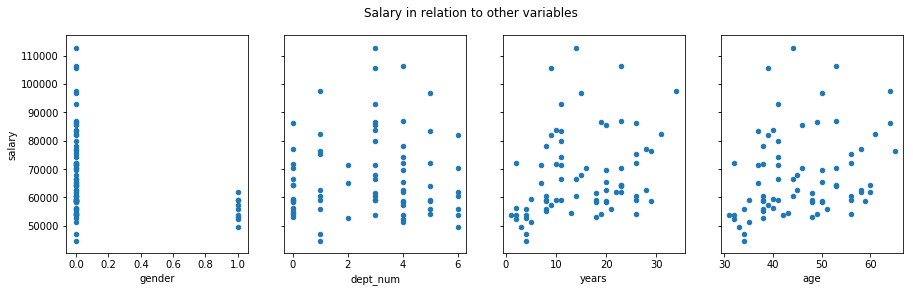

In [39]:
f, axs = plt.subplots(1, 4, sharey=True)
f.suptitle('Salary in relation to other variables')
df.plot(kind='scatter', x='gender', y='salary', ax=axs[0], figsize=(15, 4))
df.plot(kind='scatter', x='dept_num', y='salary', ax=axs[1])
df.plot(kind='scatter', x='years', y='salary', ax=axs[2])
df.plot(kind='scatter', x='age', y='salary', ax=axs[3])

The problem is that it treats department as a continuous variable. 

### Generating bar - errorbar plots in Pandas

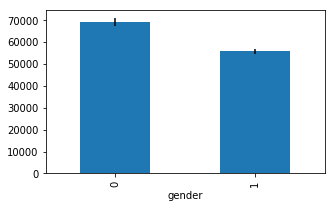

In [40]:
means = df.groupby('gender').mean()['salary']
errors = df.groupby('gender').std()['salary'] / np.sqrt(df.groupby('gender').count()['salary'])
ax = means.plot.bar(yerr=errors,figsize=(5,3))

## Interactive Plots
Interactive data visualizations are an exciting development and are likely to continue to grow in popularity with the rapid developments in web frontend frameworks. Covering these libraries is beyond the scope of this tutorial, but I highly encourage you to check them out. Some of them are surprisingly easy to use and make exploring your data and sharing your results much more fun.

It is possible to add some basic interactivity to the plotting libraries covered in this tutorial in jupyter notebooks with [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/). You will see a few examples of this in other tutorials.

### Plotly
[Plotly](https://plotly.com/python/) is an graphing library to make interactive plots.

### Bokeh
[Bokeh](https://docs.bokeh.org/en/latest/index.html) is an interactive visualization library
    
### Altair
[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python based on Vega


## Exercises 
The following exercises uses the dataset "salary_exercise.csv" adapted from material available [here](http://data.princeton.edu/wws509/datasets/#salary)

These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college. The variables are:

 - sx = Sex, coded 1 for female and 0 for male
 - rk = Rank, coded
 - 1 for assistant professor,
 - 2 for associate professor, and
 - 3 for full professor
 - yr = Number of years in current rank
 - dg = Highest degree, coded 1 if doctorate, 0 if masters
 - yd = Number of years since highest degree was earned
 - sl = Academic year salary, in dollars.

Reference: S. Weisberg (1985). Applied Linear Regression, Second Edition. New York: John Wiley and Sons. Page 194.


### Exercise 1
Recreate the plot shown in figure.   
On the left is a correlation of all parameters of only the male professors.  
On the right is the same but only for female professors.   
The colormap code used is `RdBu_r`. Read the Docstrings on sns.heatmap or search the internet to figure out how to change the colormap, scale the colorbar, and create square line boundaries.   
Place titles for each plot as shown, and your name as the main title.   

![](../images/plotting/hw2-3.png)

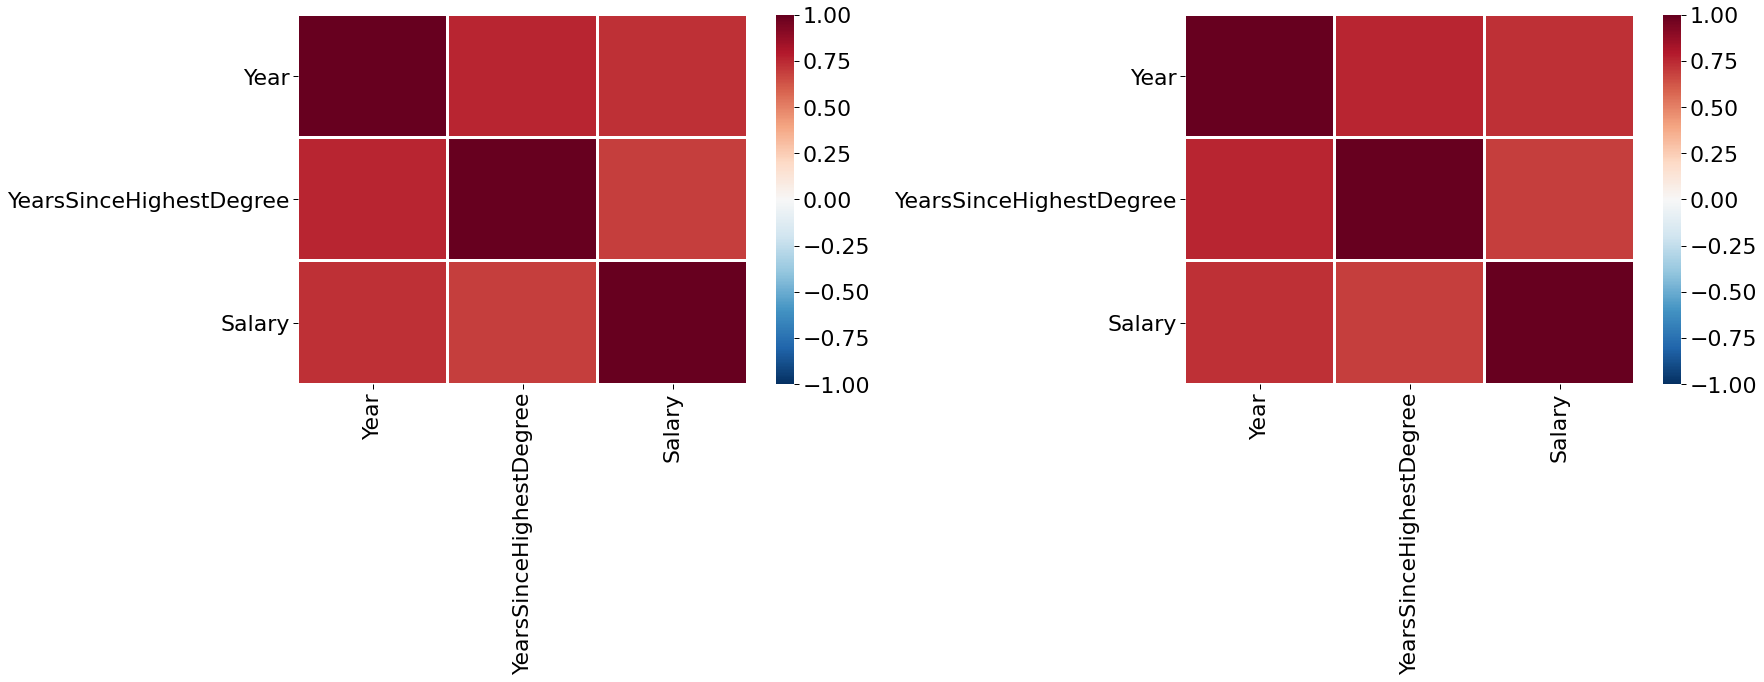

In [94]:
data = pd.read_csv('../data/salary/salary_exercise.csv')
data.columns = ['Sex', 'Rank', 'Year', 'Degree', 'YearsSinceHighestDegree', 'Salary']

with sns.plotting_context(context='paper', font_scale=2.5):
    f,a = plt.subplots(ncols=2, nrows=1, figsize=(25, 10))
    sns.heatmap(data.query('Sex=="male"').corr(), 
                linewidths=2, cmap='RdBu_r', vmin=-1, vmax=1, ax=a[0])

    sns.heatmap(data.query('Sex=="male"').corr(), 
                linewidths=2, cmap='RdBu_r', vmin=-1, vmax=1, ax=a[1])
    plt.tight_layout()

### Exercise 2
Recreate the following plot from the salary_exercise.csv dataset.   
Create a 1 x 2 subplot.   
On the left is a bar-errorbar of salary per gender.   
On the right is a scatterplot of salary on y-axis and years in rank on the x-axis.  
Set the axis limits as shown in the picture and modify their lables.   
Add axis label names.   
Add a legend for the scatterplot and place it at a bottom-right location.  
Add your name as the main title of the plot.   

![](../images/plotting/hw2-4.png)

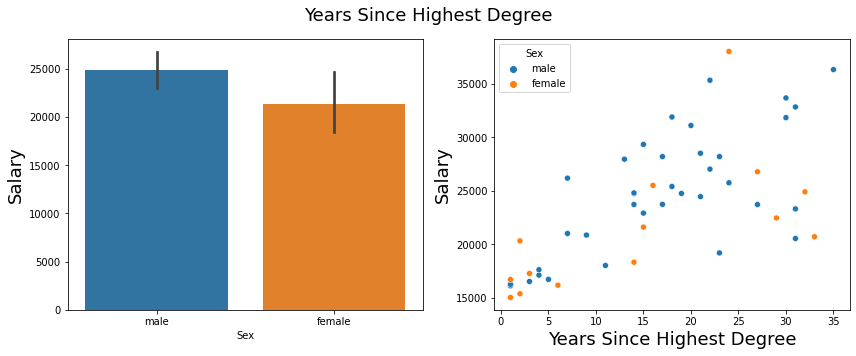

In [85]:
data = pd.read_csv('../data/salary/salary_exercise.csv')
data.columns = ['Sex', 'Rank', 'Year', 'Degree', 'YearsSinceHighestDegree', 'Salary']
f,a = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.barplot(data=data, x='Sex', y='Salary', ax=a[0])
a[0].set_ylabel('Salary', fontsize=18)

sns.scatterplot(data=data, x='YearsSinceHighestDegree', y='Salary', hue='Sex', ax=a[1])
a[1].set_ylabel('Salary', fontsize=18)
a[1].set_xlabel('Years Since Highest Degree', fontsize=18)
plt.suptitle('Years Since Highest Degree', fontsize=18)
plt.tight_layout()